Importing libraries

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Loading data

In [17]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

Display the first five rows of the dataset.

In [18]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


Display the number of rows and columns.

In [19]:
df.shape

(11398, 85)

Plot the distribution curve for the column `ConvertedComp`.

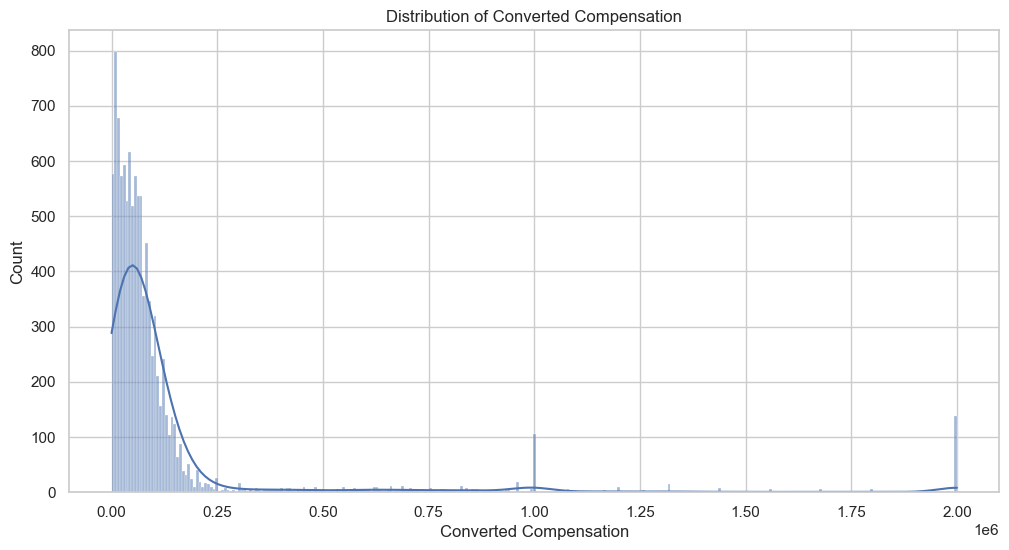

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x="ConvertedComp", kde=True)
plt.title("Distribution of Converted Compensation")
plt.xlabel("Converted Compensation")
plt.ylabel("Count")
plt.show()

Plot the histogram for the column `ConvertedComp`.

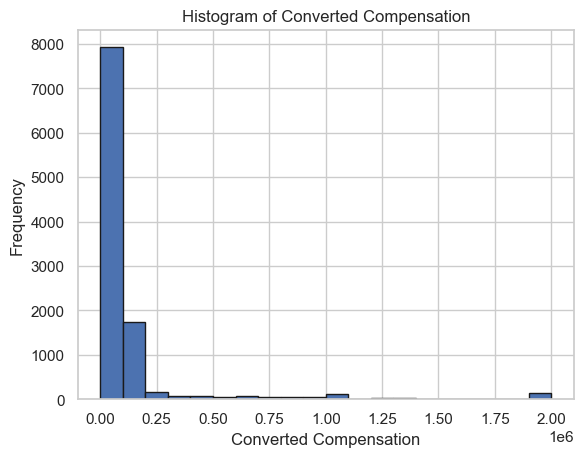

In [21]:
df = df.dropna(subset=['ConvertedComp'])

# Create a histogram
plt.hist(df['ConvertedComp'], bins=20, edgecolor='k')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.show()

Display the median, mean and standard deviation statistics.

In [22]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

How many responders identified themselves only as a **Man**?


In [23]:
df["Gender"].value_counts()

Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?

In [33]:
woman_data = df[df['Gender'] == 'Woman']
print("Median ConvertedComp for Women:", woman_data['ConvertedComp'].median())

Median ConvertedComp for Women: 57708.0


Plot a histogram of the column Age.

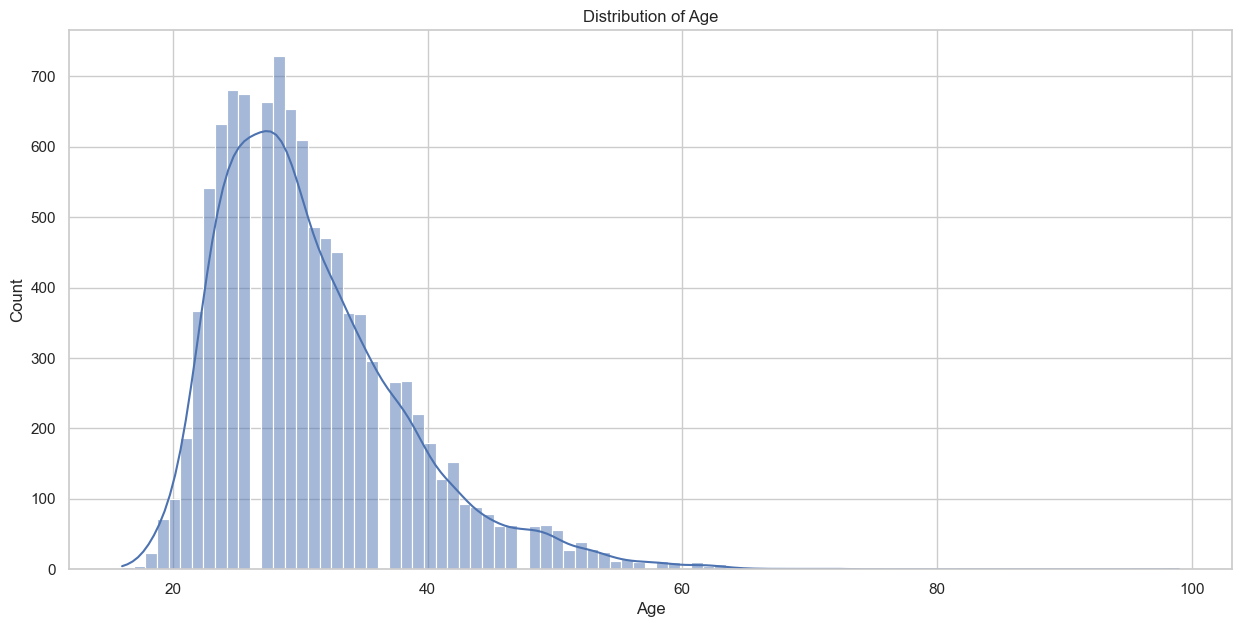

In [42]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x="Age", kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Outliers

Find out if outliers exist in the column `ConvertedComp` using a box plot?

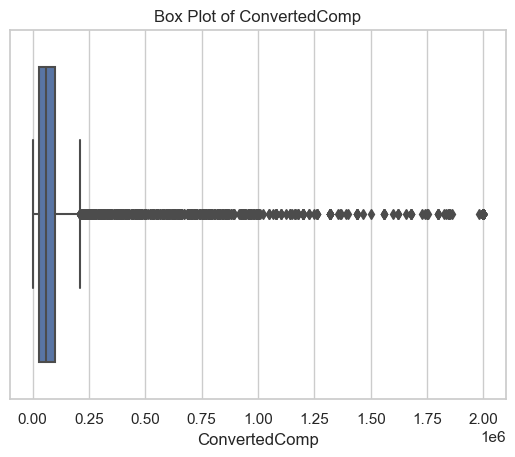

In [43]:
sns.boxplot(x=df['ConvertedComp'])

plt.xlabel("ConvertedComp")
plt.title("Box Plot of ConvertedComp")

plt.show()

Text(0.5, 1.0, 'Box Plot of Age')

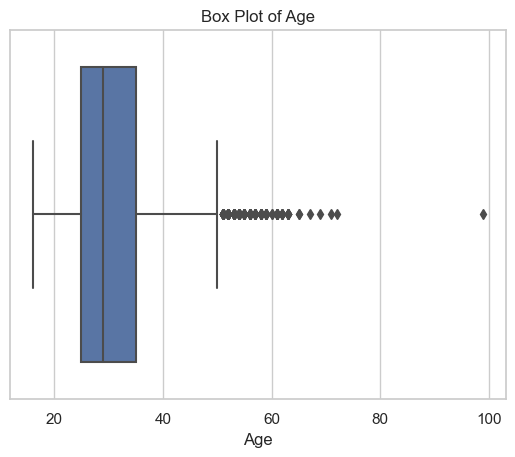

In [45]:
sns.boxplot(x=df['Age'])

plt.xlabel("Age")
plt.title("Box Plot of Age")

Find out the Inter Quartile Range for the column ConvertedComp and Age.

In [46]:
df["ConvertedComp"].quantile([0.25,0.5,0.75])

0.25     26868.0
0.50     57745.0
0.75    100000.0
Name: ConvertedComp, dtype: float64

In [47]:
df["Age"].quantile([0.25,0.5,0.75])

0.25    25.0
0.50    29.0
0.75    35.0
Name: Age, dtype: float64

Find out the upper and lower bounds.

In [49]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound for potential outliers:", lower_bound)
print("Upper Bound for potential outliers:", upper_bound)

Lower Bound for potential outliers: -82830.0
Upper Bound for potential outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [50]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = len(outliers)

print("Number of outliers in the ConvertedComp column:", num_outliers)

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.

In [51]:
filtered_data = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

In [52]:
filtered_data.shape

(9703, 85)

# Correlation

### Finding correlation

Find the correlation between `Age` and all other numerical columns.

C:\Users\ardaz\AppData\Local\Temp\ipykernel_15336\425208139.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


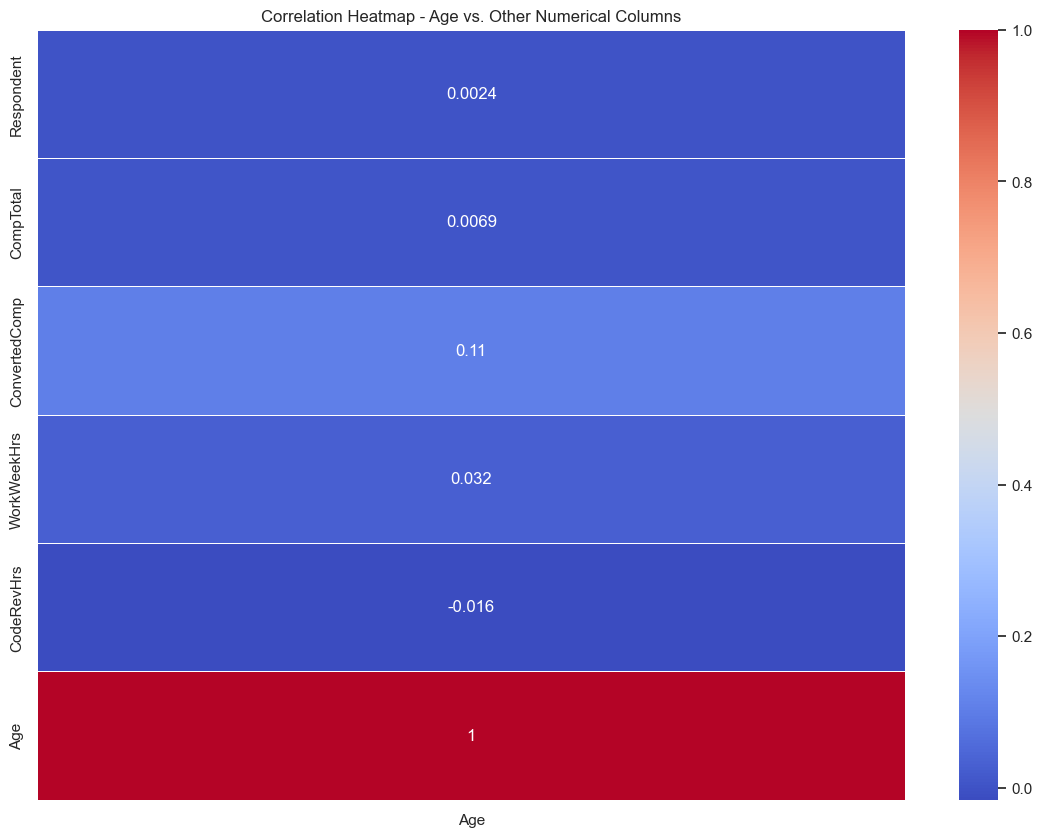

In [67]:
correlation_matrix = df.corr()

# Select the correlation values between 'Age' and all other numerical columns
age_correlation = correlation_matrix['Age']

# Create a heatmap
plt.figure(figsize=(14, 10))  # Adjust the figure size if needed
sns.heatmap(age_correlation.to_frame(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title("Correlation Heatmap - Age vs. Other Numerical Columns")
plt.show()